# Importing necessary libraries

In [103]:
import pandas as pd
data_frame=pd.read_csv("IPL_Matches_2008_2022_final.csv")
data_frame

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,MR Benson,SL Shastri


# Exploratory Data Analysis

In [104]:
!pip install pandas-profiling

from pandas_profiling import ProfileReport

profile = ProfileReport(data_frame, title='Pandas Profiling Report', explorative=True)

profile.to_file("report_1.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Approach 1

In [105]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# Data Cleaning
data=data_frame.copy(deep=True)
# Replace team names and other values in the dataset
data['Team1'] = data['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
data['Team2'] = data['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
data['WinningTeam'] = data['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
data['TossWinner'] = data['TossWinner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

data['Team1'] = data['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
data['Team2'] = data['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
data['WinningTeam'] = data['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
data['TossWinner'] = data['TossWinner'].str.replace('Kings XI Punjab', 'Punjab Kings')

data['Team1'] = data['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data['Team2'] = data['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data['WinningTeam'] = data['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data['TossWinner'] = data['TossWinner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

data['Team1'] = data['Team1'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data['Team2'] = data['Team2'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data['WinningTeam'] = data['WinningTeam'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data['TossWinner'] = data['TossWinner'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

data['Team1'] = data['Team1'].str.replace('Pune Warriors', 'Rising Pune Supergiant')
data['Team2'] = data['Team2'].str.replace('Pune Warriors', 'Rising Pune Supergiant')
data['WinningTeam'] = data['WinningTeam'].str.replace('Pune Warriors', 'Rising Pune Supergiant')
data['TossWinner'] = data['TossWinner'].str.replace('Pune Warriors', 'Rising Pune Supergiant')

data['Team1'] = data['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
data['Team2'] = data['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
data['WinningTeam'] = data['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')
data['TossWinner'] = data['TossWinner'].str.replace('Gujarat Lions', 'Gujarat Titans')

data['Team1'] = data['Team1'].str.replace('Kochi Tuskers Kerala', 'Gujarat Titans')
data['Team2'] = data['Team2'].str.replace('Kochi Tuskers Kerala', 'Gujarat Titans')
data['WinningTeam'] = data['WinningTeam'].str.replace('Kochi Tuskers Kerala', 'Gujarat Titans')

data['Team1'] = data['Team1'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')
data['Team2'] = data['Team2'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')
data['WinningTeam'] = data['WinningTeam'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')
data['TossWinner'] = data['TossWinner'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')


data.drop(['Date',"ID","MatchNumber","method","SuperOver","WonBy","Margin","Player_of_Match"],axis=1,inplace=True)
data.dropna(inplace=True)
data['Venue'] = data['Venue'].str.split(',').str[0]

In [106]:

columns_to_check = ['Team1', 'Team2', 'TossDecision', 'TossWinner', 'City','Season','Umpire1','Umpire2','Venue','WinningTeam']
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
outliers = ((data[columns_to_check] < (Q1 - outlier_threshold * IQR)) |
            (data[columns_to_check] > (Q3 + outlier_threshold * IQR)))
outlier_rows = data[outliers.any(axis=1)]
print("Rows with outliers:")
print(outlier_rows)


Rows with outliers:
Empty DataFrame
Columns: [City, Season, Team1, Team2, Venue, TossWinner, TossDecision, WinningTeam, Umpire1, Umpire2]
Index: []


<ipython-input-106-1daac2ac6e91>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data[columns_to_check].quantile(0.25)
<ipython-input-106-1daac2ac6e91>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data[columns_to_check].quantile(0.75)
<ipython-input-106-1daac2ac6e91>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data[columns_to_check] < (Q1 - outlier_threshold * IQR)) |
<ipython-input-106-1daac2ac6e91>:7: FutureWarning: Automatic reindexi

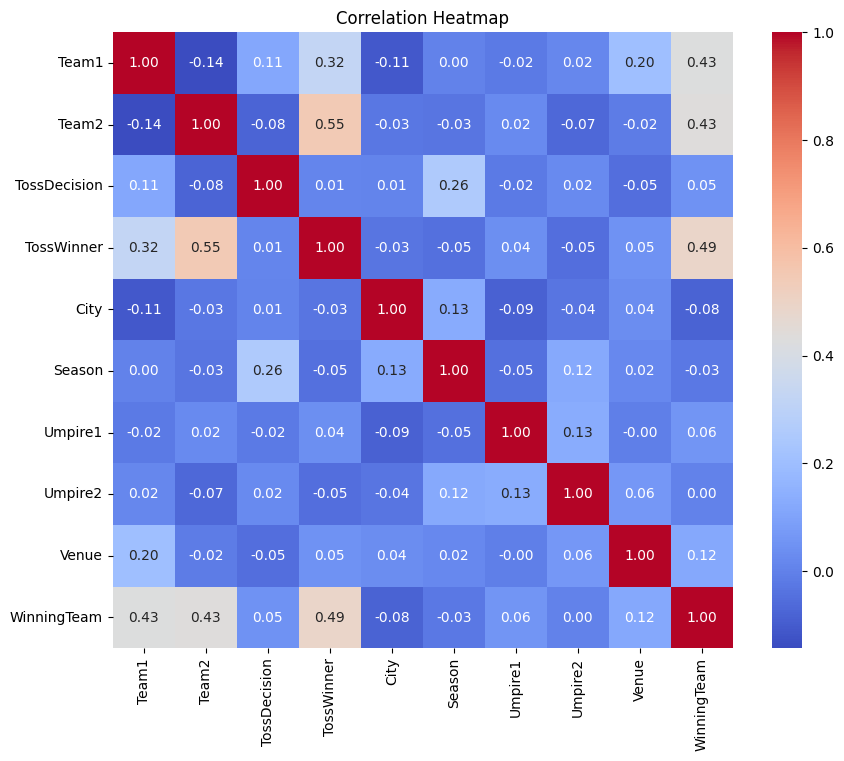

In [107]:
#finding the highly correlated features (Feature Importance)
correlation_dataframe= data.copy(deep=True)
features = ['Team1', 'Team2', 'TossDecision', 'TossWinner', 'City','Season','Umpire1','Umpire2','Venue','WinningTeam' ]
df_1 = correlation_dataframe[features]
label_encoder = LabelEncoder()
for feature in features:
    df_1[feature] = label_encoder.fit_transform(df_1[feature])
df_1.dropna(inplace=True)

correlation_matrix = df_1.corr()
correlation_matrix.mean()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [108]:
y = df_1['WinningTeam']
X = df_1[['Team1', 'Team2', 'TossDecision', 'TossWinner', 'City','Season','Umpire1','Umpire2','Venue'] ]


X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [109]:

rf_model = RandomForestClassifier()
sfm_rf = SelectFromModel(rf_model)
X_train_rf_selected = sfm_rf.fit_transform(X_train, y_train)


gb_model = GradientBoostingClassifier()
sfm_gb = SelectFromModel(gb_model)
X_train_gb_selected = sfm_gb.fit_transform(X_train, y_train)

lasso_model = Lasso(alpha=0.1)
sfm_lasso = SelectFromModel(lasso_model)
X_train_lasso_selected = sfm_lasso.fit_transform(X_train, y_train)

print("Selected features from Random Forest:", sfm_rf.get_support(indices=True))
print("Selected features from Gradient Boosting:", sfm_gb.get_support(indices=True))
print("Selected features from LASSO:", sfm_lasso.get_support(indices=True))

Selected features from Random Forest: [0 1 3 6 7]
Selected features from Gradient Boosting: [0 1 3 8]
Selected features from LASSO: [0 1 3 6 7 8]


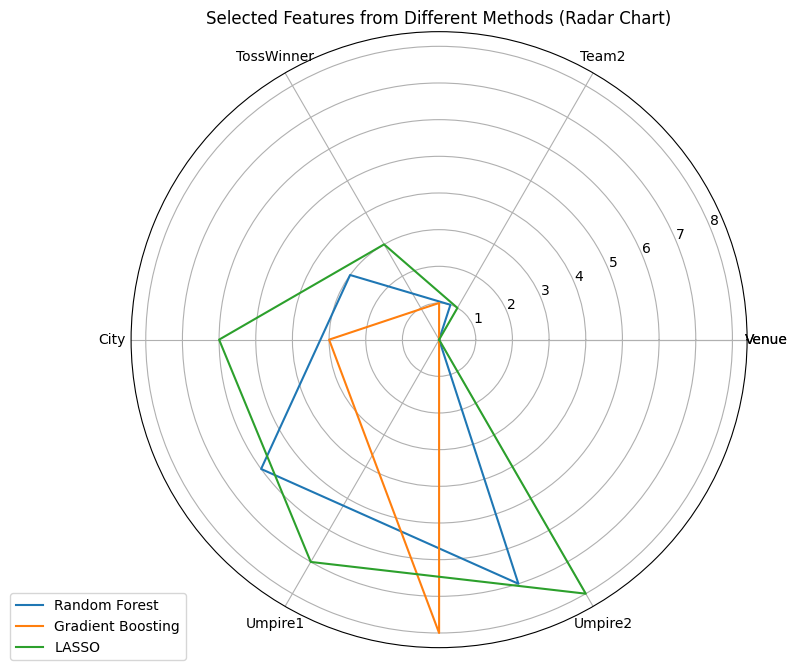

In [110]:
import numpy as np
import matplotlib.pyplot as plt

selected_features = [
    np.array([0, 1, 3, 6, 7]),
    np.array([0, 1, 3,8]),
    np.array([0, 1, 3, 6,7, 8])
]

feature_labels = ["Team1", "Team2", "TossWinner", "City", "Umpire1", "Umpire2", "Venue"]

method_names = ["Random Forest", "Gradient Boosting", "LASSO"]

plt.figure(figsize=(8, 8))
for i, features in enumerate(selected_features):
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False)
    values = np.concatenate((features, [features[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    plt.polar(angles, values, label=method_names[i])
plt.xticks(angles[:], feature_labels)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Selected Features from Different Methods (Radar Chart)")
plt.show()


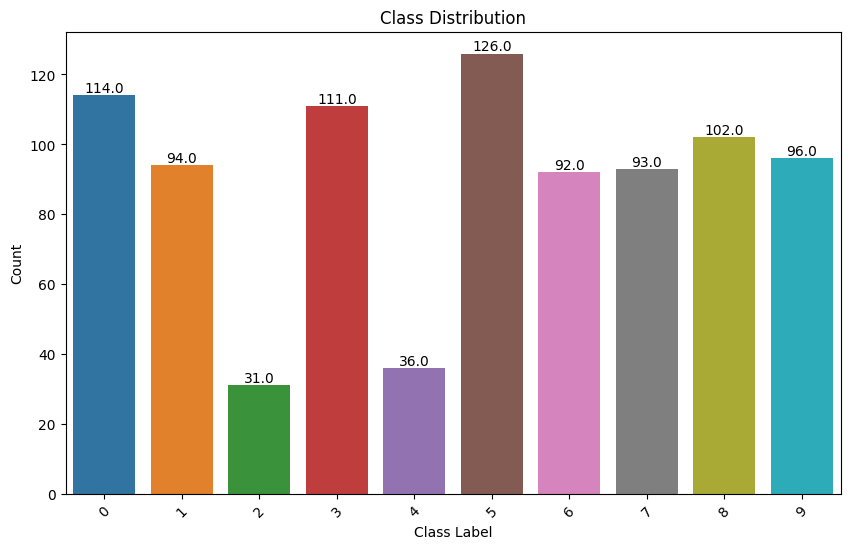

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax=sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


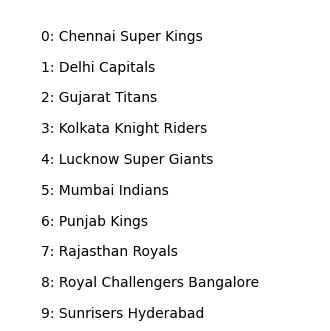

In [112]:
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

plt.figure(figsize=(4, 4))
plt.axis('off')

for key, value in label_mapping.items():
    plt.text(0.1, 0.9 - key * 0.1, f"{key}: {value}", transform=plt.gca().transAxes)

plt.show()


In [113]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


smoteenn = SMOTEENN()
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)


random_over = RandomOverSampler()
X_train_random_over, y_train_random_over = random_over.fit_resample(X_train, y_train)


random_under = RandomUnderSampler()
X_train_random_under, y_train_random_under = random_under.fit_resample(X_train, y_train)

rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)


rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

rf_smoteenn = RandomForestClassifier(random_state=42)
rf_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)


rf_random_over = RandomForestClassifier(random_state=42)
rf_random_over.fit(X_train_random_over, y_train_random_over)


rf_random_under = RandomForestClassifier(random_state=42)
rf_random_under.fit(X_train_random_under, y_train_random_under)


y_pred_original = rf_original.predict(X_test)
y_pred_smote = rf_smote.predict(X_test)
y_pred_smoteenn = rf_smoteenn.predict(X_test)
y_pred_random_over = rf_random_over.predict(X_test)
y_pred_random_under = rf_random_under.predict(X_test)

def calculate_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1



accuracy_original, precision_original, recall_original, f1_original = calculate_metrics(y_test, y_pred_original)
accuracy_smote, precision_smote, recall_smote, f1_smote = calculate_metrics(y_test, y_pred_smote)
accuracy_smoteenn, precision_smoteenn, recall_smoteenn, f1_smoteenn = calculate_metrics(y_test, y_pred_smoteenn)
accuracy_random_over, precision_random_over, recall_random_over, f1_random_over = calculate_metrics(y_test, y_pred_random_over)
accuracy_random_under, precision_random_under, recall_random_under, f1_random_under = calculate_metrics(y_test, y_pred_random_under)


results_df = pd.DataFrame({
    'Resampling Strategy': ['Original Data', 'SMOTE', 'SMOTEENN', 'RandomOver', 'RandomUnder'],
    'Accuracy': [accuracy_original, accuracy_smote, accuracy_smoteenn, accuracy_random_over, accuracy_random_under],
    'Precision': [precision_original, precision_smote, precision_smoteenn, precision_random_over, precision_random_under],
    'Recall': [recall_original, recall_smote, recall_smoteenn, recall_random_over, recall_random_under],
    'F1-score': [f1_original, f1_smote, f1_smoteenn, f1_random_over, f1_random_under]
})


results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Resampling Strategy,Accuracy,Precision,Recall,F1-score
0,Original Data,0.511111,0.545701,0.511111,0.502485
1,SMOTE,0.511111,0.523294,0.511111,0.491437
2,SMOTEENN,0.211111,0.244455,0.211111,0.208011
3,RandomOver,0.444444,0.439080,0.444444,0.432430
4,RandomUnder,0.455556,0.482206,0.455556,0.443629


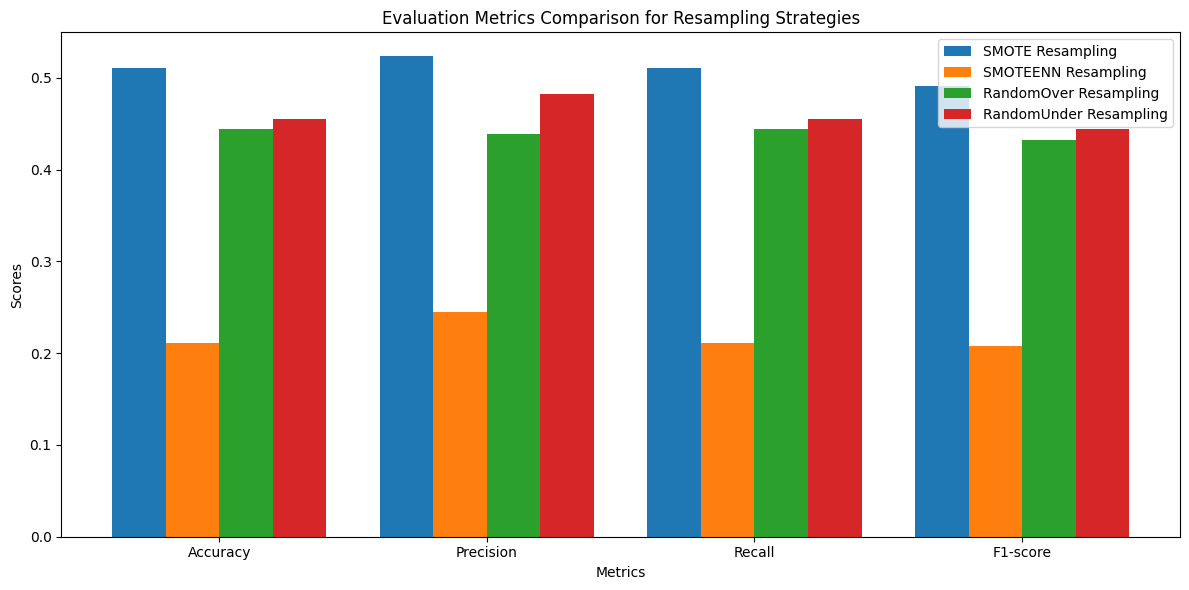

In [114]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
smote_scores = [accuracy_smote, precision_smote, recall_smote, f1_smote]
smoteenn_scores = [accuracy_smoteenn, precision_smoteenn, recall_smoteenn, f1_smoteenn]
randomover_scores = [accuracy_random_over, precision_random_over, recall_random_over, f1_random_over]
randomunder_scores = [accuracy_random_under, precision_random_under, recall_random_under, f1_random_under]


positions = np.arange(len(metrics))
width = 0.2


plt.figure(figsize=(12, 6))
plt.bar(positions - width, smote_scores, width, label='SMOTE Resampling')
plt.bar(positions, smoteenn_scores, width, label='SMOTEENN Resampling')
plt.bar(positions + width, randomover_scores, width, label='RandomOver Resampling')
plt.bar(positions + 2 * width, randomunder_scores, width, label='RandomUnder Resampling')


plt.xticks(positions + width/2, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison for Resampling Strategies')
plt.legend()


plt.tight_layout()
plt.show()


In [115]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
models = {
    'Random Forest': (RandomForestClassifier(random_state=42),
                      {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    'SVM': (SVC(random_state=42),
            {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],
             'gamma': ['scale', 'auto']}),
    'KNN': (KNeighborsClassifier(),
            {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000),
                            {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                             'solver': ['liblinear', 'saga']}),
    'Naive Bayes': (GaussianNB(),
                    {}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]})
}

best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_model = None

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []



for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_ros, y_train_ros)

    y_pred = grid_search.predict(X_val)


    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)


    if accuracy > best_accuracy and precision > best_precision  and recall > best_recall and f1 > best_f1:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1 = f1
        best_model_base = grid_search.best_estimator_


table_data = []
for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracies, precisions, recalls, f1_scores):
    table_data.append([model_name, accuracy, precision, recall, f1])


table_headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']


print(tabulate(table_data, headers=table_headers, tablefmt='grid', numalign='center', stralign='center'))

print(f'Best Model: {best_model_base}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best Precison: {best_precision}')
print(f'Best Recall: {best_recall}')
print(f'Best F1: {best_f1}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+---------------------+------------+-------------+----------+------------+
|        Model        |  Accuracy  |  Precision  |  Recall  |  F1-score  |
+=====================+============+=============+==========+============+
|    Random Forest    |  0.516854  |  0.511599   | 0.516854 |  0.507103  |
+---------------------+------------+-------------+----------+------------+
|         SVM         |  0.191011  |   0.31236   | 0.191011 |  0.151037  |
+---------------------+------------+-------------+----------+------------+
|         KNN         |  0.258427  |  0.256608   | 0.258427 |  0.245688  |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |  0.168539  |  0.143592   | 0.168539 |  0.142378  |
+---------------------+------------+-------------+----------+------------+
|     Naive Bayes     |  0.247191  |  0.290289   | 0.247191 |  0.234122  |
+---------------------+------------+-------------+----------+------------+
|    Decision Tree    |  

In [116]:
y_test_pred = best_model_base.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
table_data = [
    ["Test Accuracy", test_accuracy],
    ["Test Precision", test_precision],
    ["Test Recall", test_recall],
    ["Test F1 Score", test_f1]
]

table_headers = ["Metric", "Value"]

print(tabulate(table_data, headers=table_headers, tablefmt='grid', numalign='center', stralign='center'))

+----------------+----------+
|     Metric     |  Value   |
+================+==========+
| Test Accuracy  | 0.488889 |
+----------------+----------+
| Test Precision | 0.505489 |
+----------------+----------+
|  Test Recall   | 0.488889 |
+----------------+----------+
| Test F1 Score  | 0.473093 |
+----------------+----------+


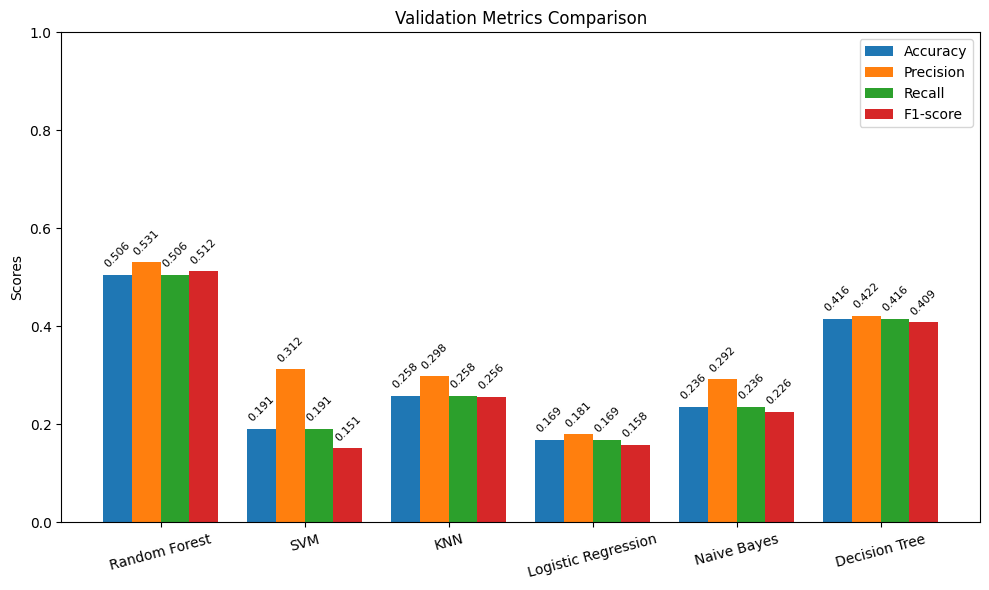

In [117]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = ['Random Forest', 'SVM', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree']

validation_metrics = np.array([
    [0.505618, 0.530725, 0.505618, 0.511996],
    [0.191011, 0.31236, 0.191011, 0.151037],
    [0.258427, 0.298335, 0.258427, 0.256172],
    [0.168539, 0.180573, 0.168539, 0.158498],
    [0.235955, 0.291729, 0.235955, 0.225976],
    [0.41573, 0.421978, 0.41573, 0.409043]
])

bar_width = 0.2

r = np.arange(len(model_names))


plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    bars = plt.bar(r + (i - 1.5) * bar_width, validation_metrics[:, i], width=bar_width, label=f'{metric}')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=8, rotation=45)


plt.xticks(r, model_names, rotation=15)
plt.ylabel('Scores')
plt.title('Validation Metrics Comparison')
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

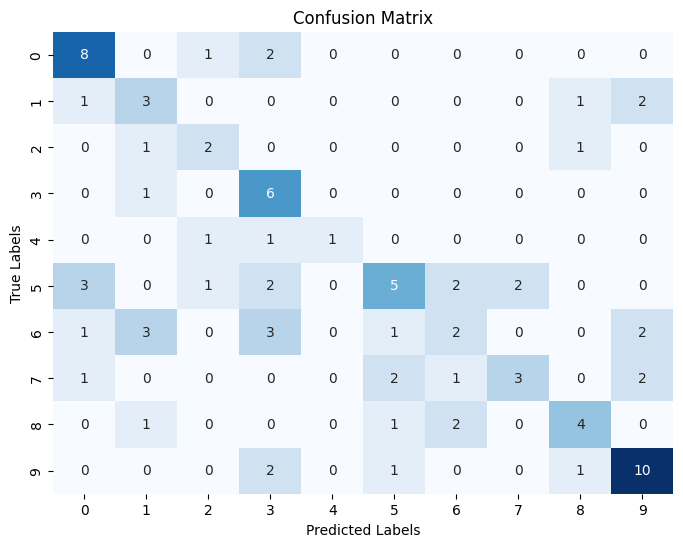

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


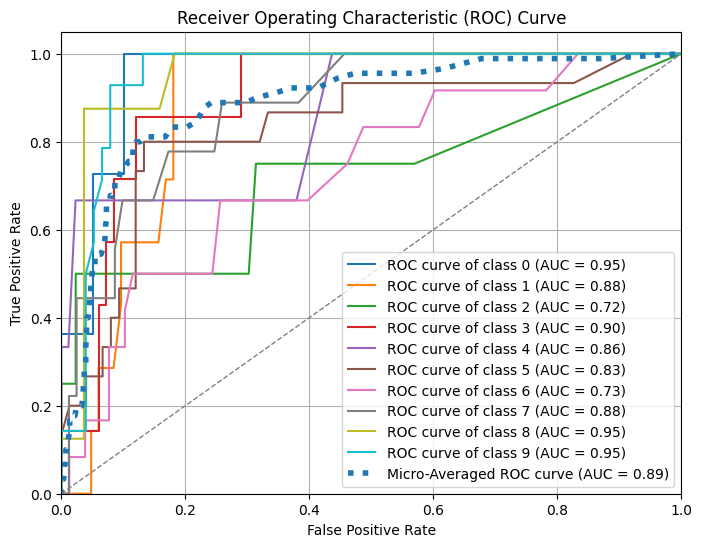

Macro-Averaged AUC: 0.87
Micro-Averaged AUC: 0.89


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

n_classes = len(np.unique(y_train_ros))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

y_prob = best_model_base.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

roc_auc_macro = np.mean(list(roc_auc.values()))


plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr_micro, tpr_micro, label='Micro-Averaged ROC curve (AUC = {0:0.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Macro-Averaged AUC: {roc_auc_macro:.2f}")
print(f"Micro-Averaged AUC: {roc_auc_micro:.2f}")


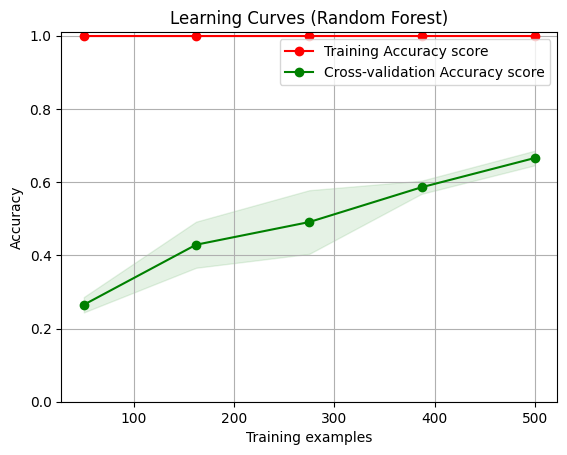

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Accuracy score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation Accuracy score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
estimator = best_model_base
plot_learning_curve(estimator, title, X_train_ros, y_train_ros, ylim=(0.0, 1.01), cv=2)

plt.show()


In [121]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(y_test, y_test_pred)

print(f"Cohen's Kappa: {kappa_score:.2f}")


Cohen's Kappa: 0.42


# major project

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-143-9bd9aa5fa834>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame_final['Venue'] = data_frame_final['Venue'].str.replace('M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium')
<ipython-input-143-9bd9aa5fa834>:131: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_frame_final.corr()


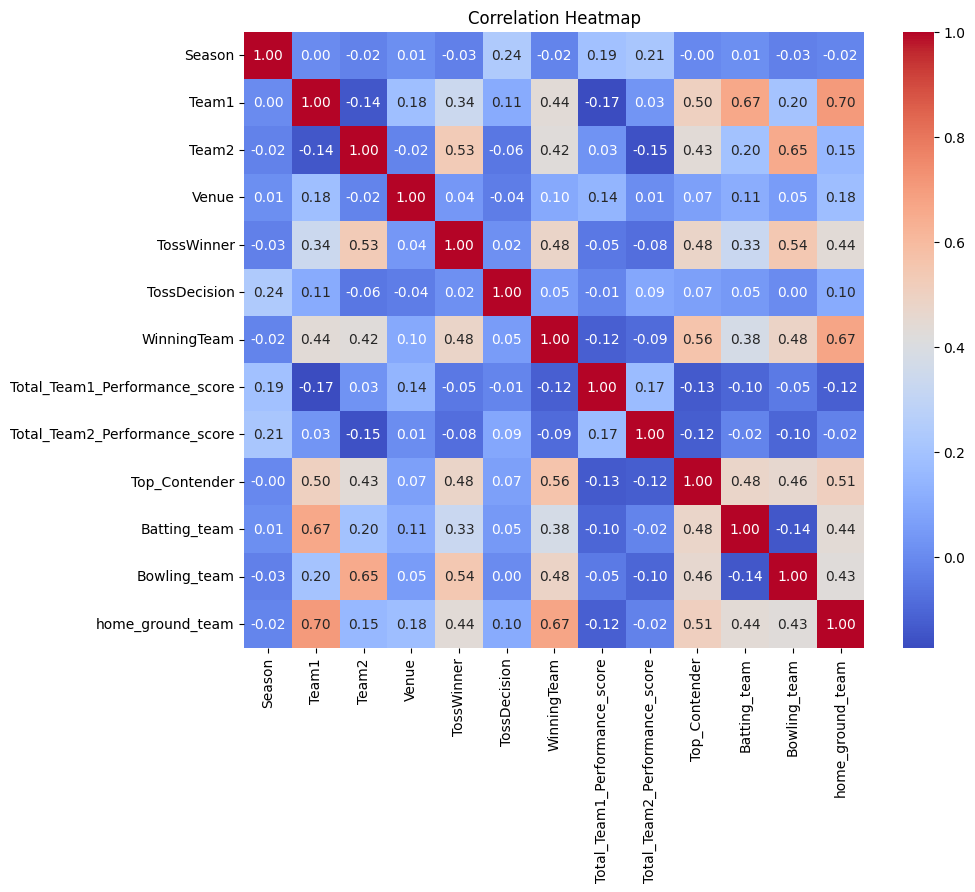

In [143]:
data_frame_final=pd.read_csv("final_team_performance_score_2.csv")
from pandas_profiling import ProfileReport

profile = ProfileReport(data_frame, title='Pandas Profiling Report', explorative=True)

profile.to_file("report_2.html")


data_frame_final['Venue'] = data_frame_final['Venue'].str.split(',').str[0]

remaining_stadiums = [
    'Dubai International Cricket Stadium',
    'Sheikh Zayed Stadium',
    'Sharjah Cricket Stadium',
    'Zayed Cricket Stadium, Abu Dhabi',
    'Newlands',
    "St George's Park",
    'Kingsmead',
    'SuperSport Park',
    'Buffalo Park',
    'De Beers Diamond Oval',
    'New Wanderers Stadium',
    'OUTsurance Oval','Zayed Cricket Stadium'
]
stadium_dict = {
    'Chennai Super Kings': ['MA Chidambaram Stadium', 'Maharashtra Cricket Association Stadium','JSCA International Stadium Complex'],
    'Delhi Capitals': ['Feroz Shah Kotla',    'Shaheed Veer Narayan Singh International Stadium','Green Park'],
    'Gujarat Titans':['Narendra Modi Stadium', 'Nehru Stadium','Sardar Patel Stadium','Saurashtra Cricket Association Stadium'],
    'Kolkata Knight Riders': ['Eden Gardens'],
    'Lucknow Super Giants': ['BRSABV Ekana Cricket Stadium', 'Subrata Roy Sahara Stadium', 'Maharashtra Cricket Association Stadium',],
    'Mumbai Indians': ['Wankhede Stadium','Brabourne Stadium','Dr DY Patil Sports Academy'],
    'Punjab Kings': ['Punjab Cricket Association Stadium','Holkar Cricket Stadium', 'Vidarbha Cricket Association Stadium','Himachal Pradesh Cricket Association Stadium'],
    'Rajasthan Royals': ['Sawai Mansingh Stadium', 'Barsapara Cricket Stadium'],
    'Royal Challengers Bangalore': ['M Chinnaswamy Stadium'],
    'Sunrisers Hyderabad': ['Rajiv Gandhi International Stadium','Barabati Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'],
}


data_frame_final['Venue'] = data_frame_final['Venue'].str.replace('Punjab Cricket Association IS Bindra Stadium', 'Punjab Cricket Association Stadium')
data_frame_final['Venue'] = data_frame_final['Venue'].str.replace('Eden Gardens, Kolkata', 'Eden Gardens')
data_frame_final['Venue'] = data_frame_final['Venue'].str.replace('M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium')
data_frame_final['Venue'] = data_frame_final['Venue'].str.replace('Arun Jaitley Stadium', 'Feroz Shah Kotla')
data_frame_final['Venue'] = data_frame_final['Venue'].str.replace('Maharashtra Cricket Association Stadium, Pune', 'Maharashtra Cricket Association Stadium')

data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Kings XI Punjab', 'Punjab Kings')


data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')


data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Pune Warriors', 'Rising Pune Supergiant')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Pune Warriors', 'Rising Pune Supergiant')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Pune Warriors', 'Rising Pune Supergiant')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Pune Warriors', 'Rising Pune Supergiant')


data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Gujarat Lions', 'Gujarat Titans')


data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Kochi Tuskers Kerala', 'Gujarat Titans')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Kochi Tuskers Kerala', 'Gujarat Titans')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Kochi Tuskers Kerala', 'Gujarat Titans')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Kochi Tuskers Kerala', 'Gujarat Titans')


data_frame_final['Team1'] = data_frame_final['Team1'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')
data_frame_final['Team2'] = data_frame_final['Team2'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')
data_frame_final['WinningTeam'] = data_frame_final['WinningTeam'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')
data_frame_final['TossWinner'] = data_frame_final['TossWinner'].str.replace('Rising Pune Supergiant', 'Lucknow Super Giants')

for index, row in data_frame_final.iterrows():
    if row['Total_Team1_Performance_score'] > row['Total_Team2_Performance_score']:
        data_frame_final.at[index, 'Top_Contender'] = data_frame_final.at[index,'Team1']
    else:
        data_frame_final.at[index, 'Top_Contender'] = data_frame_final.at[index,'Team2']
    if row['TossWinner']==row['Team1']:
      if row['TossDecision']=='bat':
        data_frame_final.at[index, 'Batting_team']=data_frame_final.at[index,'Team1']
        data_frame_final.at[index, 'Bowling_team']=data_frame_final.at[index,'Team2']
      else:
        data_frame_final.at[index, 'Batting_team']=data_frame_final.at[index,'Team2']
        data_frame_final.at[index, 'Bowling_team']=data_frame_final.at[index,'Team1']
    else:
      if row['TossDecision']=='bat':
        data_frame_final.at[index, 'Batting_team']=data_frame_final.at[index,'Team2']
        data_frame_final.at[index, 'Bowling_team']=data_frame_final.at[index,'Team1']
      else:
        data_frame_final.at[index, 'Batting_team']=data_frame_final.at[index,'Team1']
        data_frame_final.at[index, 'Bowling_team']=data_frame_final.at[index,'Team2']

    if row['Venue'] in remaining_stadiums:
      data_frame_final.at[index,'home_ground_team']=data_frame_final.at[index,'WinningTeam']
    else:
      venue = row['Venue']
      for team, stadiums in stadium_dict.items():
          if venue in stadiums:
            if team==row['Team1'] or team==row['Team2']:
              data_frame_final.at[index, 'home_ground_team'] = team
              break
            else:
              data_frame_final.at[index,'home_ground_team']=data_frame_final.at[index,'WinningTeam']



features = ['Team1', 'Team2', 'TossDecision', 'TossWinner','Season','Venue','WinningTeam','Top_Contender','Batting_team','Bowling_team','home_ground_team']
#  Update the target column name
label_encoder_1 = LabelEncoder()
for feature in features:
    data_frame_final[feature] = label_encoder_1.fit_transform(data_frame_final[feature])
data_frame_final

correlation_matrix = data_frame_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [144]:
final_dataframe = data_frame_final.drop(['City','Season','Date','Venue','TossDecision','method','Umpire1','Umpire2','players_team1','players_team2','Total_Team1_Performance_score','Total_Team2_Performance_score'], axis=1)
final_dataframe.dropna(inplace=True)

In [145]:
null_rows = final_dataframe[final_dataframe.isnull().any(axis=1)]

null_rows

,Team1,Team2,TossWinner,WinningTeam,Top_Contender,Batting_team,Bowling_team,home_ground_team


In [146]:
features = ['Team1', 'Team2', 'TossWinner','WinningTeam','Top_Contender','Batting_team','Bowling_team','home_ground_team']

label_encoder = LabelEncoder()
for feature in features:
    final_dataframe[feature] = label_encoder.fit_transform(final_dataframe[feature])


X = final_dataframe.drop('WinningTeam', axis=1)
y = final_dataframe['WinningTeam']



from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

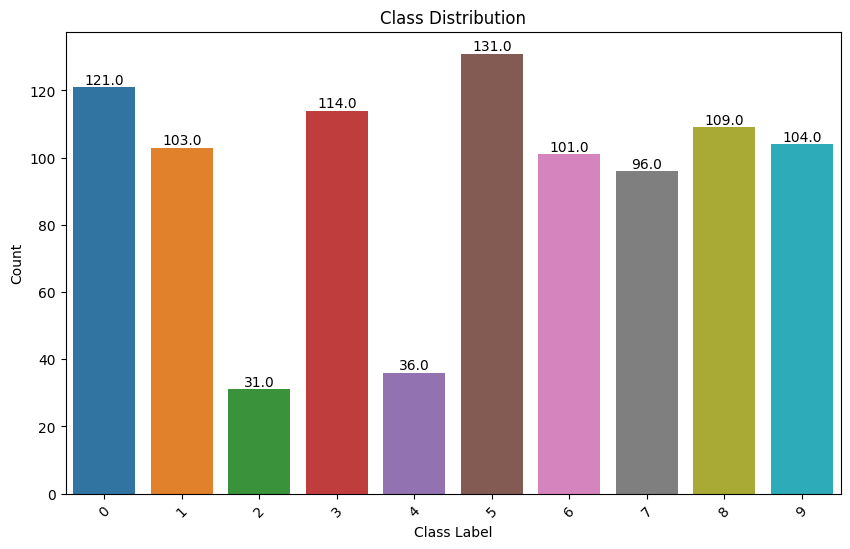

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax=sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


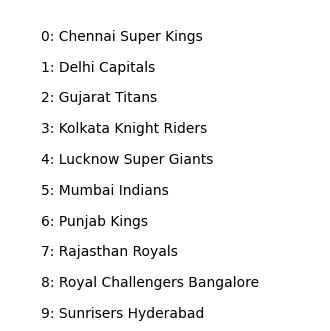

In [127]:
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

plt.figure(figsize=(4, 4))
plt.axis('off')

for key, value in label_mapping.items():
    plt.text(0.1, 0.9 - key * 0.1, f"{key}: {value}", transform=plt.gca().transAxes)

plt.show()


In [128]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


smoteenn = SMOTEENN()
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)


random_over = RandomOverSampler()
X_train_random_over, y_train_random_over = random_over.fit_resample(X_train, y_train)


random_under = RandomUnderSampler()
X_train_random_under, y_train_random_under = random_under.fit_resample(X_train, y_train)

rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)


rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

rf_smoteenn = RandomForestClassifier(random_state=42)
rf_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)


rf_random_over = RandomForestClassifier(random_state=42)
rf_random_over.fit(X_train_random_over, y_train_random_over)


rf_random_under = RandomForestClassifier(random_state=42)
rf_random_under.fit(X_train_random_under, y_train_random_under)


y_pred_original = rf_original.predict(X_test)
y_pred_smote = rf_smote.predict(X_test)
y_pred_smoteenn = rf_smoteenn.predict(X_test)
y_pred_random_over = rf_random_over.predict(X_test)
y_pred_random_under = rf_random_under.predict(X_test)

def calculate_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1



accuracy_original, precision_original, recall_original, f1_original = calculate_metrics(y_test, y_pred_original)
accuracy_smote, precision_smote, recall_smote, f1_smote = calculate_metrics(y_test, y_pred_smote)
accuracy_smoteenn, precision_smoteenn, recall_smoteenn, f1_smoteenn = calculate_metrics(y_test, y_pred_smoteenn)
accuracy_random_over, precision_random_over, recall_random_over, f1_random_over = calculate_metrics(y_test, y_pred_random_over)
accuracy_random_under, precision_random_under, recall_random_under, f1_random_under = calculate_metrics(y_test, y_pred_random_under)


results_df = pd.DataFrame({
    'Resampling Strategy': ['Original Data', 'SMOTE', 'SMOTEENN', 'RandomOver', 'RandomUnder'],
    'Accuracy': [accuracy_original, accuracy_smote, accuracy_smoteenn, accuracy_random_over, accuracy_random_under],
    'Precision': [precision_original, precision_smote, precision_smoteenn, precision_random_over, precision_random_under],
    'Recall': [recall_original, recall_smote, recall_smoteenn, recall_random_over, recall_random_under],
    'F1-score': [f1_original, f1_smote, f1_smoteenn, f1_random_over, f1_random_under]
})


results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

,Resampling Strategy,Accuracy,Precision,Recall,F1-score
0,Original Data,0.631579,0.660652,0.631579,0.640119
1,SMOTE,0.642105,0.682442,0.642105,0.651191
2,SMOTEENN,0.526316,0.574670,0.526316,0.530842
3,RandomOver,0.652632,0.690604,0.652632,0.664983
4,RandomUnder,0.663158,0.715909,0.663158,0.674938


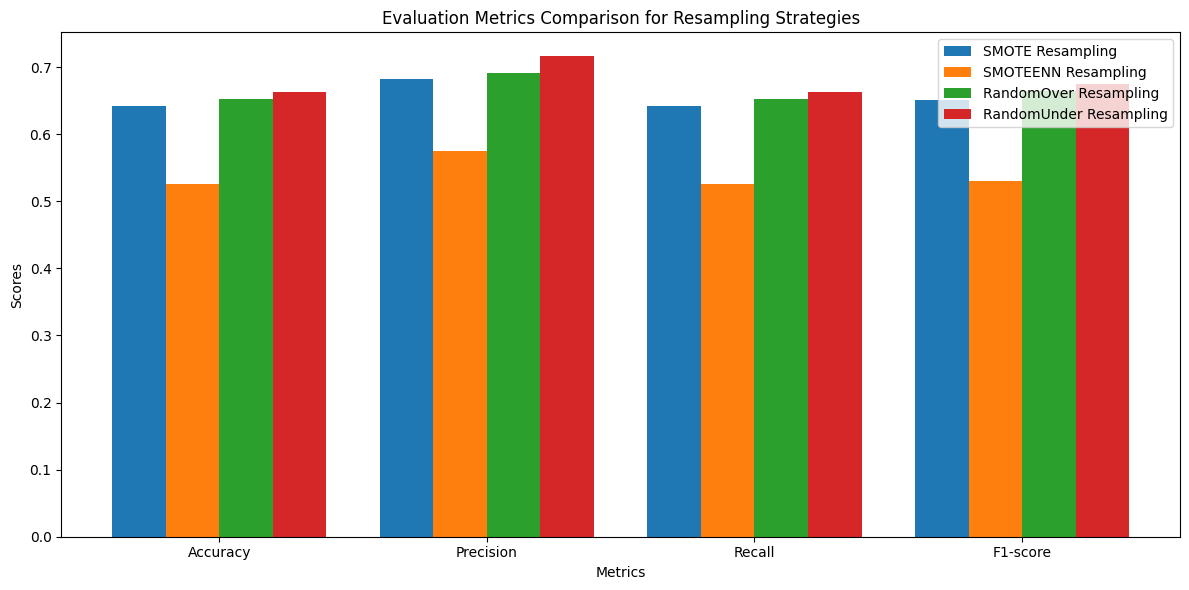

In [129]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
smote_scores = [accuracy_smote, precision_smote, recall_smote, f1_smote]
smoteenn_scores = [accuracy_smoteenn, precision_smoteenn, recall_smoteenn, f1_smoteenn]
randomover_scores = [accuracy_random_over, precision_random_over, recall_random_over, f1_random_over]
randomunder_scores = [accuracy_random_under, precision_random_under, recall_random_under, f1_random_under]


positions = np.arange(len(metrics))
width = 0.2


plt.figure(figsize=(12, 6))
plt.bar(positions - width, smote_scores, width, label='SMOTE Resampling')
plt.bar(positions, smoteenn_scores, width, label='SMOTEENN Resampling')
plt.bar(positions + width, randomover_scores, width, label='RandomOver Resampling')
plt.bar(positions + 2 * width, randomunder_scores, width, label='RandomUnder Resampling')


plt.xticks(positions + width/2, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison for Resampling Strategies')
plt.legend()


plt.tight_layout()
plt.show()


In [147]:
ros = RandomOverSampler()
X_train_ros_1, y_train_ros_1 = ros.fit_resample(X_train, y_train)


models = {
    'Random Forest': (RandomForestClassifier(random_state=42),
                      {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    'SVM': (SVC(random_state=42),
            {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],
             'gamma': ['scale', 'auto']}),
    'KNN': (KNeighborsClassifier(),
            {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000),
                            {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                             'solver': ['liblinear', 'saga']}),
    'Naive Bayes': (GaussianNB(),
                    {}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]})
}

best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_model = None

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []



for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_ros_1, y_train_ros_1)

    y_pred = grid_search.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')


    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    if accuracy > best_accuracy and precision > best_precision  and recall > best_recall and f1 > best_f1:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1 = f1
        best_model = grid_search.best_estimator_


table_data = []
for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracies, precisions, recalls, f1_scores):
    table_data.append([model_name, accuracy, precision, recall, f1])

table_headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']


print(tabulate(table_data, headers=table_headers, tablefmt='grid', numalign='center', stralign='center'))

print(f'Best Model: {best_model}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best Precison: {best_precision}')
print(f'Best Recall: {best_recall}')
print(f'Best F1: {best_f1}')

+---------------------+------------+-------------+----------+------------+
|        Model        |  Accuracy  |  Precision  |  Recall  |  F1-score  |
+=====================+============+=============+==========+============+
|    Random Forest    |  0.669014  |  0.676336   | 0.669014 |  0.668641  |
+---------------------+------------+-------------+----------+------------+
|         SVM         |  0.591549  |  0.597564   | 0.591549 |  0.589578  |
+---------------------+------------+-------------+----------+------------+
|         KNN         |  0.514085  |  0.537402   | 0.514085 |  0.518074  |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |  0.21831   |  0.270238   | 0.21831  |  0.19327   |
+---------------------+------------+-------------+----------+------------+
|     Naive Bayes     |  0.302817  |  0.271327   | 0.302817 |  0.244434  |
+---------------------+------------+-------------+----------+------------+
|    Decision Tree    |  

In [148]:
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
table_data = [
    ["Test Accuracy", test_accuracy],
    ["Test Precision", test_precision],
    ["Test Recall", test_recall],
    ["Test F1 Score", test_f1]
]

table_headers = ["Metric", "Value"]

print(tabulate(table_data, headers=table_headers, tablefmt='grid', numalign='center', stralign='center'))

+----------------+----------+
|     Metric     |  Value   |
+================+==========+
| Test Accuracy  | 0.678322 |
+----------------+----------+
| Test Precision | 0.675701 |
+----------------+----------+
|  Test Recall   | 0.678322 |
+----------------+----------+
| Test F1 Score  | 0.669916 |
+----------------+----------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


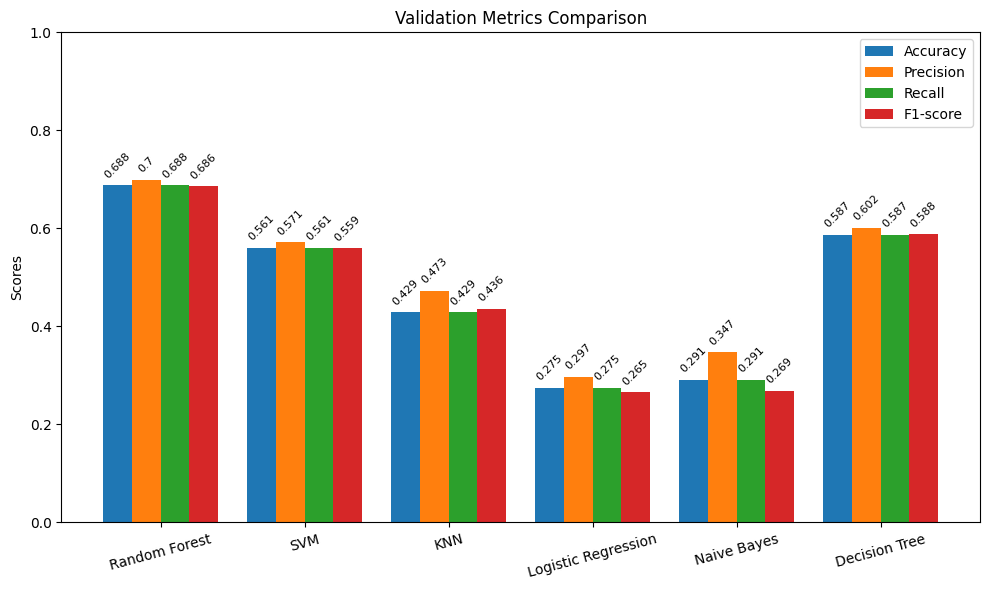

In [132]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = ['Random Forest', 'SVM', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree']

validation_metrics = np.array([
[ 0.687831, 0.699618, 0.687831, 0.68559],
    [ 0.560847, 0.571485, 0.560847, 0.559267],
    [ 0.428571, 0.473048, 0.428571, 0.436273],
    [ 0.275132, 0.297249, 0.275132, 0.26506],
    [ 0.291005, 0.347346, 0.291005, 0.268642],
    [ 0.587302, 0.601662, 0.587302, 0.587659]
])

bar_width = 0.2

r = np.arange(len(model_names))


plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    bars = plt.bar(r + (i - 1.5) * bar_width, validation_metrics[:, i], width=bar_width, label=f'{metric}')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=8, rotation=45)


plt.xticks(r, model_names, rotation=15)
plt.ylabel('Scores')
plt.title('Validation Metrics Comparison')
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

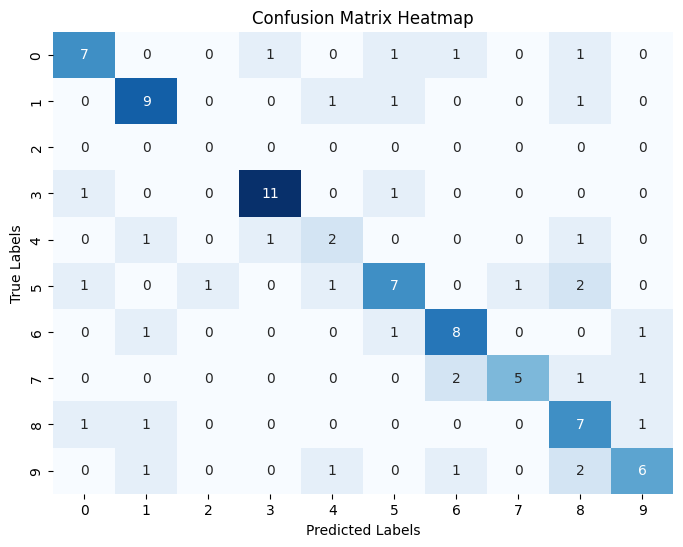

In [133]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


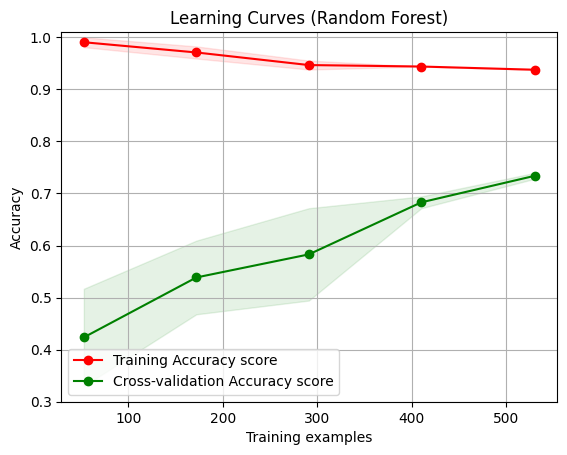

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Accuracy score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation Accuracy score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
estimator = best_model
plot_learning_curve(estimator, title, X_train_ros_1, y_train_ros_1, ylim=(0.3, 1.01), cv=2)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


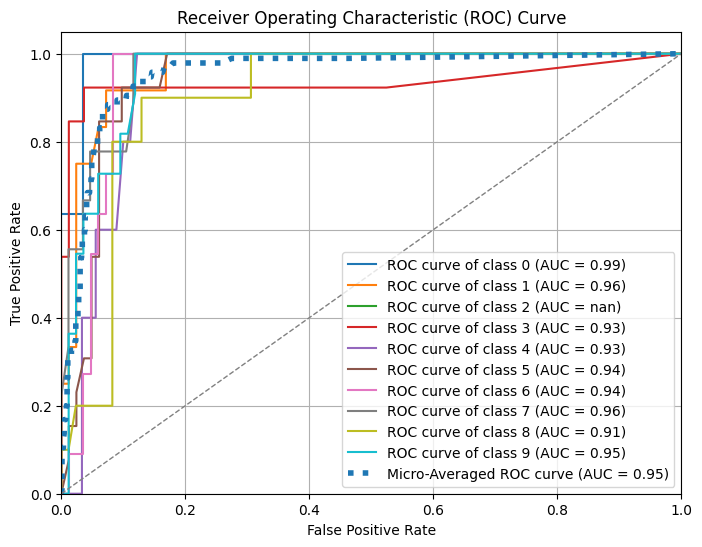

Macro-Averaged AUC: nan
Micro-Averaged AUC: 0.95


In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier




# Binarize the labels
n_classes = len(np.unique(y_train_ros_1))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Predict probabilities
y_prob = best_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate micro-averaged AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Calculate macro-averaged AUC
roc_auc_macro = np.mean(list(roc_auc.values()))

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr_micro, tpr_micro, label='Micro-Averaged ROC curve (AUC = {0:0.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Macro-Averaged AUC: {roc_auc_macro:.2f}")
print(f"Micro-Averaged AUC: {roc_auc_micro:.2f}")


In [136]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(y_test, y_test_pred)

print(f"Cohen's Kappa: {kappa_score:.2f}")

Cohen's Kappa: 0.61
